In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
df_train = pd.read_excel("Flight Data_Train.xlsx")
df_test = pd.read_excel("Flight Test_set.xlsx")

In [507]:
df = pd.concat([df_train,df_test])

In [508]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [509]:
df.shape

(13354, 11)

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [511]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [512]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17968\1954500797.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


In [513]:
df["year"] = df["Date_of_Journey"].dt.year
df["month"] = df["Date_of_Journey"].dt.month
df["day"] = df["Date_of_Journey"].dt.day

## Alternative

# df["year"] = df["Date_of_Journey"].str.split("/").str[2]
# df["month"] = df["Date_of_Journey"].str.split("/").str[1]
# df["day"] = df["Date_of_Journey"].str.split("/").str[0]

## Alternative

# df["Date"] = df["Date_of_Journey"].apply(lambda x:x.split("/")[0])
# df["month"] = df["Date_of_Journey"].apply(lambda x:x.split("/")[1])
# df["year"] = df["Date_of_Journey"].apply(lambda x:x.split("/")[2])

In [514]:
df = df.drop("Date_of_Journey", axis = 1)

In [515]:
df


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,2019,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,2019,3,27
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,2019,3,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,2019,3,6


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  year             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  day              13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


In [517]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(":").str[1]

In [518]:
df = df.drop("Arrival_Time", axis = 1)

In [519]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,2019,3,24,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,2019,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,2019,6,9,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,2019,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,2019,3,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,2019,6,6,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,2019,3,27,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,2019,3,6,04,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,2019,3,6,19,15


In [520]:
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17968\2185248847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13354 non-null  object        
 1   Source           13354 non-null  object        
 2   Destination      13354 non-null  object        
 3   Route            13353 non-null  object        
 4   Dep_Time         13354 non-null  datetime64[ns]
 5   Duration         13354 non-null  object        
 6   Total_Stops      13353 non-null  object        
 7   Additional_Info  13354 non-null  object        
 8   Price            10683 non-null  float64       
 9   year             13354 non-null  int32         
 10  month            13354 non-null  int32         
 11  day              13354 non-null  int32         
 12  Arrival_hour     13354 non-null  object        
 13  Arrival_min      13354 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), 

In [522]:
df["Dep_min"] = df["Dep_Time"].dt.minute

In [523]:
df["Dep_hour"] = df["Dep_Time"].dt.hour

In [524]:
df=df.drop("Dep_Time", axis = 1)

In [525]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_min,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,2019,3,24,01,10,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,2019,5,1,13,15,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,2019,6,9,04,25,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,2019,5,12,23,30,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,2019,3,1,21,35,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,2019,6,6,20,25,30,20
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,2019,3,27,16,55,20,14
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,2019,3,6,04,25,50,21
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,2019,3,6,19,15,0,4


In [526]:
 df["Duration"].str.split(" ").str[0].str.split("h").str[0]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: object

In [527]:
df["Duration_hour"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [528]:
df["Duration_hour"] 

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hour, Length: 13354, dtype: object

In [529]:
df["Duration_min"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [530]:
df = df.drop("Duration",axis = 1)

In [531]:
df[df["Duration_hour"]=="5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_min,Dep_min,Dep_hour,Duration_hour,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327.0,2019,3,6,16,55,50,16,5m,NaN
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,NaN,2019,3,12,16,55,50,16,5m,NaN


In [532]:
df = df.drop(df[df["Duration_hour"]=="5m"].index)

In [533]:
df["Duration_hour"]  = df["Duration_hour"].astype(int)


In [534]:
df["Duration_min"].fillna(0, inplace  = True)

In [535]:
df["Duration_min"] = df["Duration_min"].astype(int)

In [536]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_min,Dep_min,Dep_hour,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2019,3,24,01,10,20,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,2019,5,1,13,15,50,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,2019,6,9,04,25,25,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,2019,5,12,23,30,5,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,2019,3,1,21,35,50,16,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,NaN,2019,6,6,20,25,30,20,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,NaN,2019,3,27,16,55,20,14,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,2019,3,6,04,25,50,21,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,2019,3,6,19,15,0,4,15,15


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Total_Stops      13350 non-null  object 
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   year             13351 non-null  int32  
 8   month            13351 non-null  int32  
 9   day              13351 non-null  int32  
 10  Arrival_hour     13351 non-null  object 
 11  Arrival_min      13351 non-null  object 
 12  Dep_min          13351 non-null  int32  
 13  Dep_hour         13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
 15  Duration_min     13351 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [538]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [539]:
df["Total_Stops"]=df["Total_Stops"].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [540]:
df.dropna(subset=['Total_Stops'], inplace=True)

In [541]:
df["Total_Stops"]= df["Total_Stops"].astype(int)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13350 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Total_Stops      13350 non-null  int32  
 5   Additional_Info  13350 non-null  object 
 6   Price            10680 non-null  float64
 7   year             13350 non-null  int32  
 8   month            13350 non-null  int32  
 9   day              13350 non-null  int32  
 10  Arrival_hour     13350 non-null  object 
 11  Arrival_min      13350 non-null  object 
 12  Dep_min          13350 non-null  int32  
 13  Dep_hour         13350 non-null  int32  
 14  Duration_hour    13350 non-null  int32  
 15  Duration_min     13350 non-null  int32  
dtypes: float64(1), int32(8), object(7)
memory usage: 1.3+ MB


In [543]:
df.drop("Route", axis = 1,inplace  = True)

In [544]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

<Axes: xlabel='Airline'>

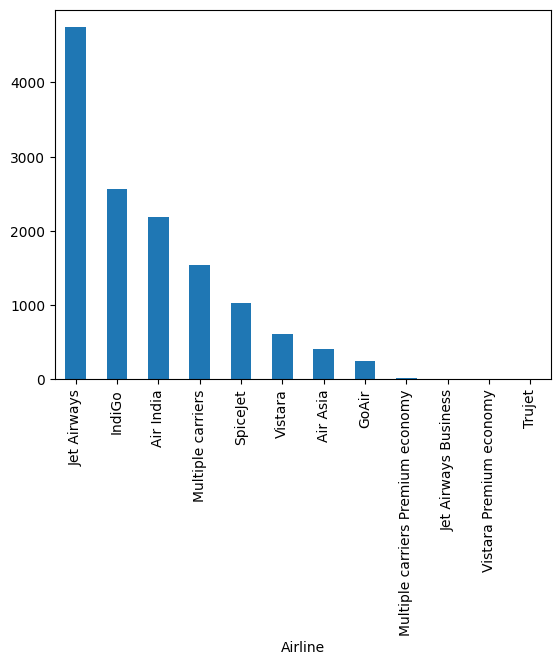

In [545]:
df.groupby("Airline").size().sort_values(ascending=False).plot(kind = "bar")

In [546]:
df.groupby("Airline").size()

Airline
Air Asia                              405
Air India                            2189
GoAir                                 240
IndiGo                               2564
Jet Airways                          4745
Jet Airways Business                    8
Multiple carriers                    1543
Multiple carriers Premium economy      16
SpiceJet                             1026
Trujet                                  1
Vistara                               608
Vistara Premium economy                 5
dtype: int64

<Axes: xlabel='Airline'>

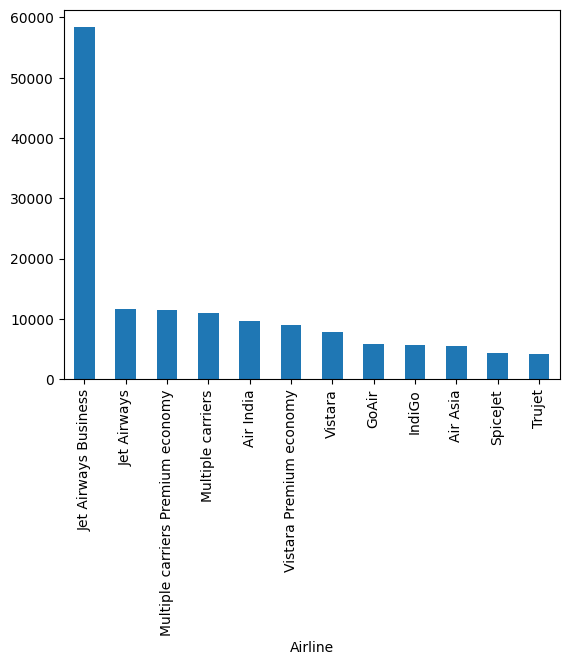

In [547]:
df.groupby("Airline").mean(numeric_only=True)["Price"].sort_values(ascending=False).plot(kind = "bar")

<Axes: xlabel='Airline'>

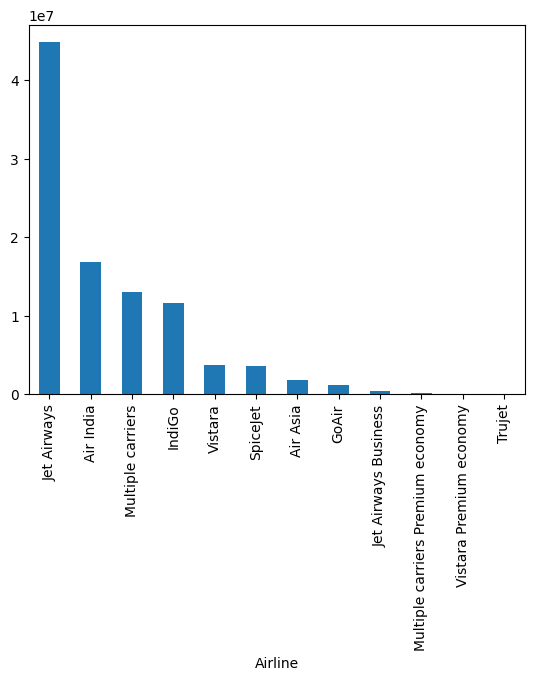

In [548]:
df.groupby("Airline").sum()["Price"].sort_values(ascending=False).plot(kind = "bar")

<Axes: xlabel='Total_Stops', ylabel='count'>

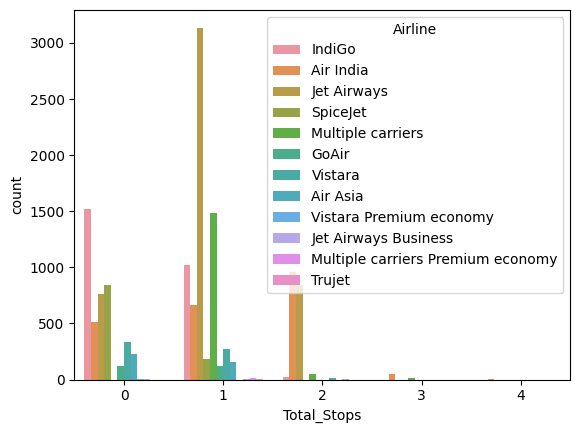

In [549]:
sns.countplot(x = "Total_Stops", data = df, hue ="Airline")

In [550]:
pd.crosstab(df["Airline"],df["Total_Stops"])


Total_Stops,0,1,2,3,4
Airline,,,,,
Air Asia,231,160,14,0,0
Air India,516,663,962,46,2
GoAir,117,123,0,0,0
IndiGo,1521,1017,26,0,0
Jet Airways,766,3137,842,0,0
Jet Airways Business,1,5,2,0,0
Multiple carriers,0,1483,50,10,0
Multiple carriers Premium economy,0,16,0,0,0
SpiceJet,846,180,0,0,0


<Axes: xlabel='Airline'>

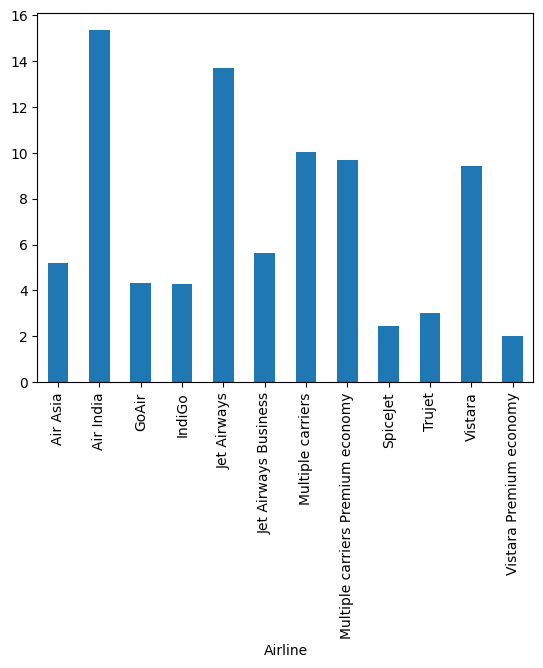

In [551]:
df.groupby("Airline").mean(numeric_only=True)["Duration_hour"].plot(kind = "bar")

In [552]:
pd.crosstab(df["Airline"],df["Source"])

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,111,0,100,194,0
Air India,413,30,932,640,174
GoAir,116,0,92,32,0
IndiGo,647,214,901,557,245
Jet Airways,986,0,1930,1560,269
Jet Airways Business,6,0,2,0,0
Multiple carriers,0,0,1543,0,0
Multiple carriers Premium economy,0,0,16,0,0
SpiceJet,224,162,106,371,163


In [553]:
for city in df["Source"].unique():
    df_pr = df[df["Source"]==city]
    print(city)
    print(df_pr.groupby("Airline").count()["Source"].sort_values(ascending = False))
    print("-----------------------------------------------")

Banglore
Airline
Jet Airways                986
IndiGo                     647
Air India                  413
Vistara                    245
SpiceJet                   224
GoAir                      116
Air Asia                   111
Jet Airways Business         6
Vistara Premium economy      4
Name: Source, dtype: int64
-----------------------------------------------
Kolkata
Airline
Jet Airways    1560
Air India       640
IndiGo          557
SpiceJet        371
Vistara         227
Air Asia        194
GoAir            32
Name: Source, dtype: int64
-----------------------------------------------
Delhi
Airline
Jet Airways                          1930
Multiple carriers                    1543
Air India                             932
IndiGo                                901
SpiceJet                              106
Air Asia                              100
GoAir                                  92
Vistara                                58
Multiple carriers Premium economy      16
Jet Ai

In [555]:
df.groupby("Source").size()

Source
Banglore    2752
Chennai      456
Delhi       5680
Kolkata     3581
Mumbai       881
dtype: int64

<Axes: xlabel='Source'>

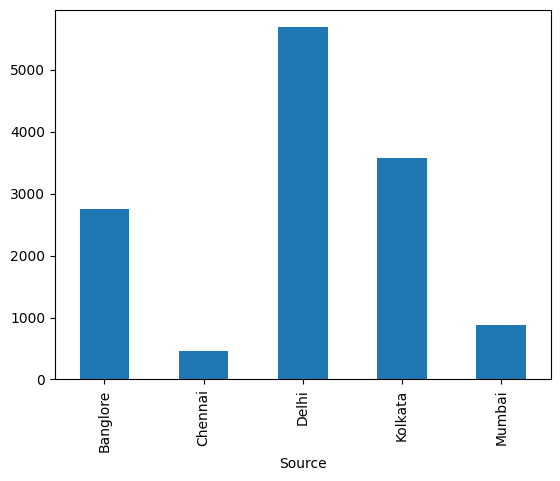

In [554]:
df.groupby("Source").size().plot(kind = "bar")

In [556]:
df.groupby("Destination").size()

Destination
Banglore     3581
Cochin       5680
Delhi        1582
Hyderabad     881
Kolkata       456
New Delhi    1170
dtype: int64

In [ ]:
df[]

In [557]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [558]:
transformer = ColumnTransformer( transformers=[
    
    ("tnf1",OneHotEncoder(sparse = False, drop = "first", handle_unknown = "ignore"),["Airline","Source","Destination","Additional_Info"])
],remainder = "passthrough")

In [559]:
X = df.drop("Price", axis = 1)

In [560]:
y = df["Price"]

In [561]:
from sklearn.model_selection import train_test_split

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [563]:
X_train.shape

(8944, 14)

In [564]:
X_tr = transformer.fit_transform(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [565]:
X_train = pd.DataFrame(X_tr)

In [566]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,2019,6,24,00,40,20,22,2,20
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,2019,4,15,22,15,30,19,2,45
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,6,6,18,15,0,20,22,15
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,3,27,04,25,0,16,12,25
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,6,24,22,25,55,7,14,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2019,5,9,21,00,0,7,14,0
8940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,5,12,09,45,35,9,24,10
8941,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2019,6,24,19,00,5,23,19,55
8942,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2019,3,3,03,25,40,0,2,45


In [567]:
X_te = transformer.transform(X_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [568]:
X_test = pd.DataFrame(X_te)

In [569]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2019,6,9,01,30,0,10,15,30
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,3,6,09,00,5,14,18,55
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,6,27,01,30,35,10,14,55
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,3,24,11,10,25,9,25,45
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,3,21,12,20,30,7,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,5,9,12,30,15,7,5,15
4402,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,3,3,04,25,15,19,9,10
4403,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2019,6,9,22,55,20,20,2,35
4404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2019,6,12,04,40,30,6,22,10
